9E1.
Which of the following is a requirement of the simple Metropolis algorithm?

    (1)The parameters must be discrete.
    (2)The likelihood function must be Gaussian.
    (3)The proposal distribution must be symmetric.

# The proposal distribution must be symmetric.

9E2.
Gibbs sampling is more efficient than the Metropolis algorithm. How does it achieve this extra
efficiency? Are there any limitations to the Gibbs sampling strategy?

# With Gibbs sampling's distribution, the proposed parameter values is scaled with the currect parameter values. Gibbs sampling can get "stuck". Improved by: https://www.researchgate.net/figure/A-modified-Gibbs-sampling-method-in-comparison-to-previous-methods-A-The-Hartree_fig2_51737586

9E3.
Which sort of parameters can Hamiltonian Monte Carlo not handle? Can you explain why?

# Discrete. There is no derivative of a discrete value

9E4.
Explain the difference between the effective number of samples,
n_eff
as calculated by Stan,
and the actual number of samples.

# The effective number of samples is an estimate of the number of independent samples from the posterior distribution, in terms of estimating some function like the posterior mean. 
# n_eff is an estimate of effective number of samples, for the purpose of estimating the posterior mean.
# The actual number of samples is samples we use for accurate inference.

9E5.
Which value should Rhat approach, when a chain is sampling the posterior distribution correctly?

# Rhat should approach 1.

 Load the data in [week5.csv](week5.csv). Your task is to accurately model the fourth column of the data using the first three as predictors. Compare at least the following models: 
    - a linear model with no interactions, 
    - a linear model with all pair-wise interactions
    - a linear model with all pair-wise and triple-wise interactions. 

In [1]:
import csv
import pymc3 as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from quap import quap
import pandas as pd

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/rasmusbergpalm/bayes-applied-stats/main/exercises/week5.csv', sep=",", header=None)

#Assuming data is on center of a bell curve
def std_columns(df, *columns):
    for column in columns:
        c = df[column]
        df[str(column)+"_std"] = (c - c.mean())/c.std()

#standardization between 0,1
def std_columns2(df, *columns):
    for column in columns:
        c = df[column]
        df[str(column)+"_std2"] = (c - min(c))/(max(c)-min(c))

std_columns(df, 0, 1, 2, 3)
std_columns2(df, 0, 1, 2, 3)
df.shape

(1000, 12)

# PYMC 3

In [ ]:
with pm.Model() as m1:  
    alpha = pm.Normal("a", 0, 0.2)
    beta = pm.Normal("b", 0, 0.5, shape=3)
    sigma = pm.Exponential("sigma", 1)
    mu = alpha + beta[0]*df["0_std"] + beta[1]*df["1_std"] + beta[2]*df["2_std"]
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=df["3_std"])
    m1_idata = pm.sample(return_inferencedata=True,tuning=1000)

C:\Users\andre\AppData\Local\Temp/ipykernel_15576/1493310322.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  m3_sample = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, c, b, a, sigma]


In [ ]:
with pm.Model() as m2:  
    alpha = pm.Normal("a", 0, 0.2)
    beta = pm.Normal("b", 0, 0.5, shape=6)
    sigma = pm.Exponential("sigma", 1)
    mu = (alpha + 
        beta[0]*df["0_std"] + 
        beta[1]*df["1_std"] + 
        beta[2]*df["2_std"] + 
        beta[3]*df["0_std"]*df["1_std"] + 
        beta[4]*df["0_std"]*df["2_std"] + 
        beta[5]*df["1_std"]*df["2_std"] 
        )

    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=df["3_std"])
    m2_idata = pm.sample(return_inferencedata=True,tune=1000)

In [71]:
with pm.Model() as m3:  
    alpha = pm.Normal("a", 0, 0.2)
    beta = pm.Normal("b", 0, 0.5, shape=7)
    sigma = pm.Exponential("sigma", 1)
    mu = (alpha + 
        beta[0]*df["0_std"] + 
        beta[1]*df["1_std"] + 
        beta[2]*df["2_std"] + 
        beta[3]*df["0_std"]*df["1_std"] + 
        beta[4]*df["0_std"]*df["2_std"] + 
        beta[5]*df["1_std"]*df["2_std"] +
        beta[6]*df["0_std"]*df["1_std"]*df["2_std"]
        )

    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=df["3_std"])
    m3_idata = pm.sample(return_inferencedata=True,tune=1000)

In [ ]:
#plot traces
az.plot_trace(m1_idata) #m2_idata, m3_idata

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

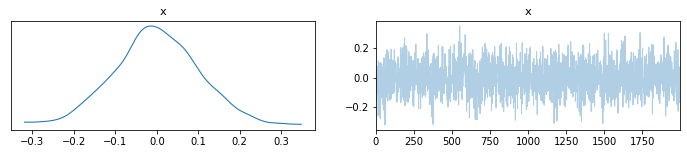

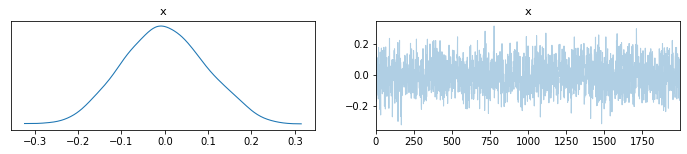

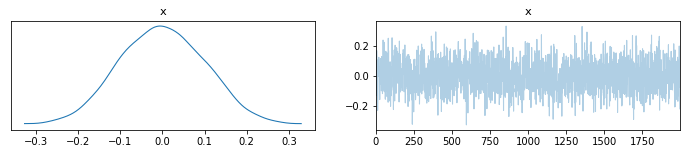

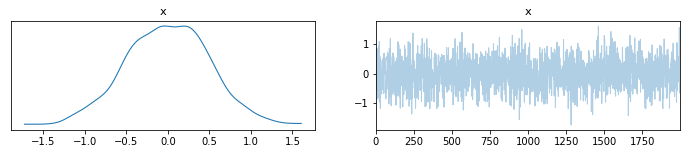

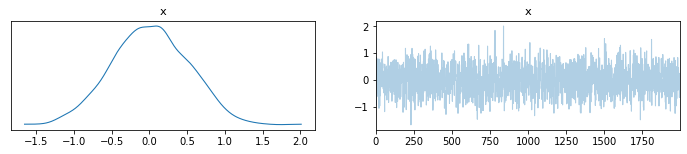

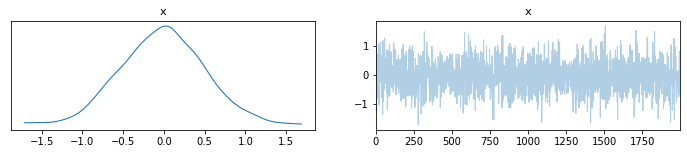

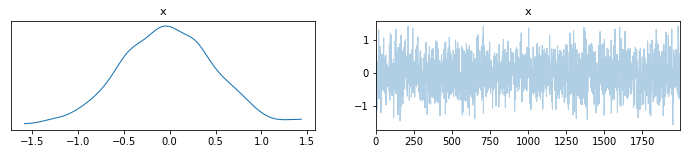

In [72]:
#compare, for more info:https://docs.pymc.io/en/v3/pymc-examples/examples/diagnostics_and_criticism/model_comparison.html
az.compare({"m1": m1_idata, "m2": m2_idata, "m3": m3_idata})

# Plotting

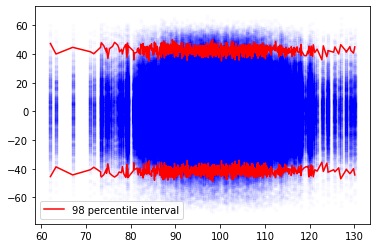

In [66]:
#Incorrect, need to rerun with correct samples

plt.plot(ntrue, nm4_prior_pred.T, 'b.', alpha=0.01)
percentiles = np.percentile(nm4_prior_pred, [1, 99], axis=0) #compute the 98 percentile interval over the prior draws, for each average speed
plt.plot(ntrue, percentiles[0], 'r-', label='98 percentile interval')
plt.plot(ntrue, percentiles[1], 'r-')
plt.legend()
plt.show()

# Linear Regression (Non-Bayesian) for Sanity check

In [150]:
import statsmodels.api as sm 

fun1 = sm.add_constant(out_df[['a','b','c']])
mod1 = sm.OLS(true, fun1)
res1 = mod1.fit()

fun2 = sm.add_constant(out_df[['a','b','c','a_b','b_c','c_a']])
mod2 = sm.OLS(true, fun2)
res2 = mod2.fit()


fun3 = sm.add_constant(out_df[['a','b','c','a_b','b_c','c_a','a_b_c']])
mod3 = sm.OLS(true, fun3)
res3 = mod3.fit()
#res1.summary()
#res2.summary()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     759.9
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:19:32   Log-Likelihood:                 784.90
No. Observations:                1000   AIC:                            -1554.
Df Residuals:                     992   BIC:                            -1515.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3400      3.687     -0.092      0.927      -7.575       6.895
a              0.0097      0.037      0.263      0.792      -0.063       0.082
b              0.0006      0.037      0.016      0.987      -0.072       0.073
c             -0.0003      0.037     -0.007      0.995      -0.072       0.072
a_b            0.0002      0.000      0.667      0.505      -0.000       0.001
b_c         2.557e-05      0.000      0.070      0.944      -0.001       0.001
c_a        -5.686e-05      0.000     -0.155      0.877      -0.001       0.001
a_b_c      -1.766e-06   3.66e-06     -0.483      0.629   -8.94e-06    5.41e-06
==============================================================================
Omnibus:                        6.439   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.660
Skew:                           0.148   Prob(JB):                       0.0358
Kurtosis:                       3.270   Cond. No.                     1.07e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9H6.
Modify the Metropolis algorithm code from the chapter to write your own simple MCMC
estimator for globe tossing data and model from Chapter 2.

In [ ]:
#Main thing is we want to add the acceptance, In python this would be 

def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

#Extra MCMC code since the book it is in R.

def prior(x):
    if(x[1] <=0):
        return 0
    return 1
def manual_log_like_normal(x,data):
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)